# Visualizing Knowledge Graphs

Cameron Pykiet, MSDS 570

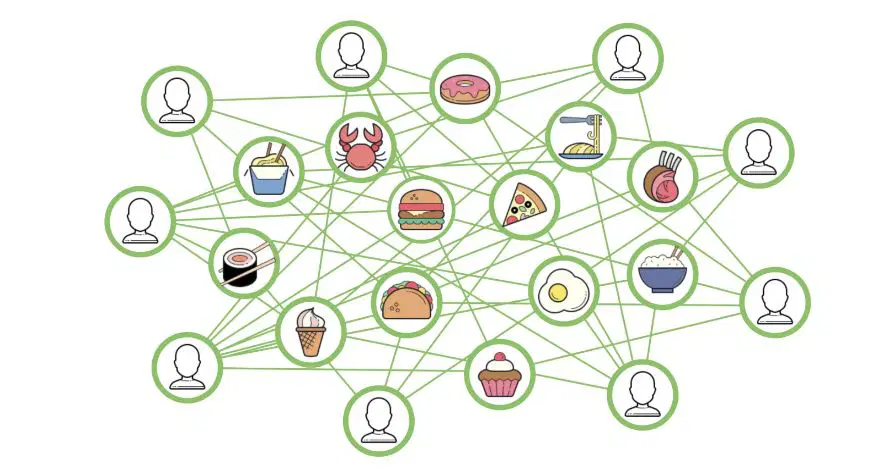

### What are Knowledge Graphs
    In 2012, Knowledge graphs were introduced into the world via the 'Google Knowledge Graph' (Introducing the Knowledge Graph: things, not strings)
    
    Knowledge graphs are a structure of data that uses a format of 'triples' which consist of a Head entity, Relation, and Tail entity. This is commonly referred to as an (H,R,T) format. 
    
    This format is useful in showing all related entities to a specific entity. Importantly, this structure can be leveraged in Machine Learning Models through embedding techniques. 

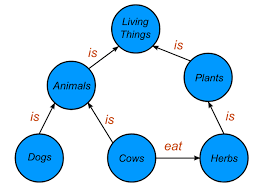

### How Knowledge Graphs are Useful

    Knowledge graphs exist in many different spaces such as, cyber security, pharmaceuticals, Biology, Material Science, etc. Some of the datasets I will be using will be regarding a drug repurposing dataset and a Cyber security dataset.
    
    Though there are many Knowledge graphs that exist, I have not ran into many tools for visualization. Thus, my project is to look into some of the possible tools that exist and show how to use some of them.

In [ ]:
'''
# Run any of these installations if you have not already or 
# Don't know if they are installed already

!pip install matplotlib
!pip install NetworkX
!pip install neo4j
!pip install pandas
!pip install py2neo
!pip install yfiles_jupyter_graphs
!pip install pyvis

'''

In [2]:
# This is a python package I made to house some of the datasets from
# my own research endeavors
import cpykg as kg

kg.list_csv_files()

['R25KG_rare.csv', 'AISecKG.csv', 'MetaQA_KG.csv', 'SDKG_Dis11.csv']

In [3]:
kg.R25KG_rare

,H,R,T
0,R-HSA-9818586,COMPLEX_IN_PATHWAY,R-HSA-9772755
1,R-HIV-165547,COMPLEX_IN_PATHWAY,R-HSA-165054
2,R-HSA-110194,COMPLEX_IN_PATHWAY,R-HSA-110329
3,R-HSA-9638048,COMPLEX_IN_PATHWAY,R-HSA-5579007
4,R-HSA-9698753,COMPLEX_IN_PATHWAY,R-HSA-9703465
...,...,...,...
2132792,Q13642,RELATED_GENETIC_DISORDER,MIM:300695
2132793,P22557,RELATED_GENETIC_DISORDER,MIM:300751
2132794,Q92889,RELATED_GENETIC_DISORDER,MIM:610965
2132795,Q99958,RELATED_GENETIC_DISORDER,MIM:153300


### This dataset comes from Bradford's research into knowledge graph embeddings for Drug Repurposing. I'll ask him for an original source if I can. 

In [4]:
kg.AISecKG

,H,R,T
0,Attacks,can_harm,public domain
1,IDS,uses,Intrusion Detection
2,Snort,uses,Intrusion Detection
3,Snort,can_detect,network attacks
4,packet logger,is_part_of,Snort
...,...,...,...
724,client,has_a,hostname
725,hostname,can_analyze,ubuntu
726,syslog,has_a,log
727,logged,can_analyze,remote server


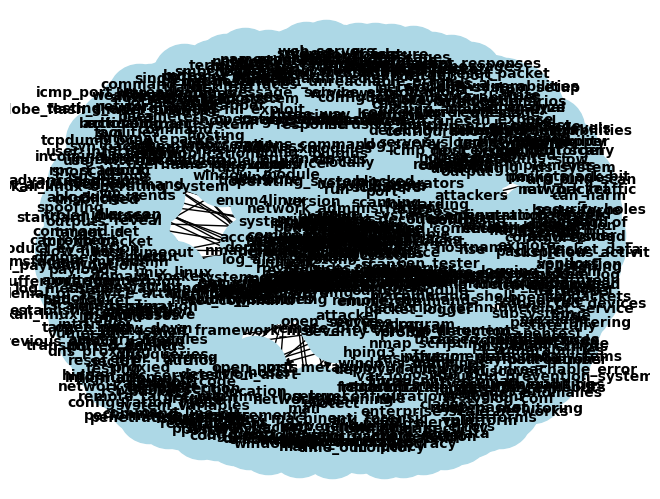

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = kg.AISecKG

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in df.iterrows():
    G.add_node(row['H'])
    G.add_node(row['R'])
    G.add_edge(row['H'], row['T'], relation=row['R'])

# Position the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')

# Draw edge labels (relations)
edge_labels = nx.get_edge_attributes(G, 'R')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.show()


In [3]:
kg.neo_graph(kg.AISecKG)

kg.vis_neo()

neo4j Username: neo4j
neo4j Password:········
Connecting through bolt://localhost:7687
Visualize up to 500 nodes


GraphWidget(layout=Layout(height='800px', width='100%'))

In [7]:
from pyvis.network import Network
import pandas as pd

# Create a Pyvis Network
net = Network(notebook=True, directed=True)

# Add nodes and edges
for _, row in df.iterrows():
    net.add_node(row['H'], label=row['H'])
    net.add_node(row['T'], label=row['T'])
    net.add_edge(row['H'], row['T'], title=row['R'])

# Show the graph
net.show("knowledge_graph.html")


knowledge_graph.html


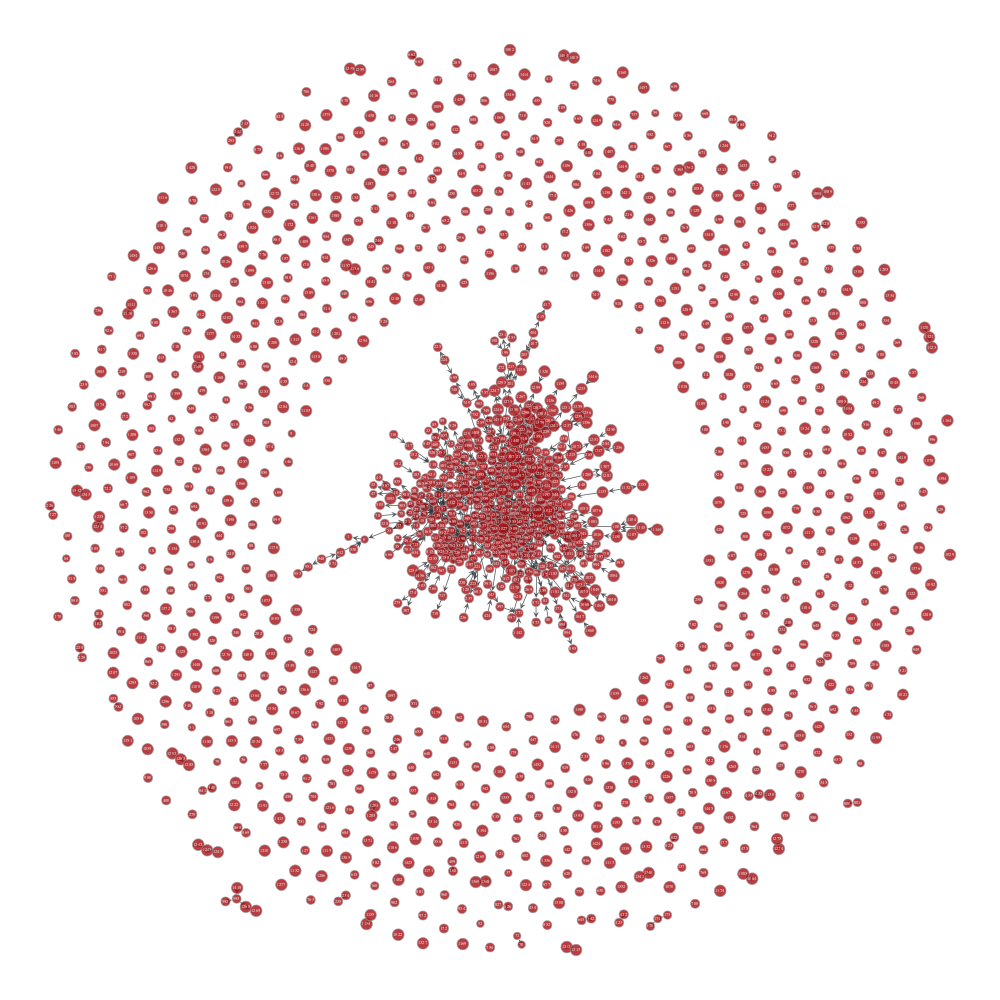

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15ac85450, at 0x14db3bd10>

In [10]:
import graph_tool.all as gt
import pandas as pd

# Sample DataFrame

# Create a directed graph
G = gt.Graph(directed=True)

# Add nodes and edges
node_map = {}
for _, row in df.iterrows():
    head = node_map.setdefault(row['H'], G.add_vertex())
    tail = node_map.setdefault(row['T'], G.add_vertex())
    edge = G.add_edge(head, tail)

# Draw the graph
gt.graph_draw(G, vertex_text=G.vertex_index, output_size=(500, 500))


##### This is the citation for the AISecKG dataset found on Github 
Agrawal, Garima, et al. "AISecKG: Knowledge Graph Dataset for Cybersecurity Education." AAAI-MAKE 2023: Challenges Requiring the Combination of Machine Learning 2023 (2023).

### Some Graph Visualization Tools

#### Neo4j

#### Matplotlib (NetworkX)

#### 

In [12]:
import plotly.graph_objs as go
import pandas as pd
import networkx as nx
import cpykg as kg

# Sample DataFrame
df = kg.AISecKG

# Create NetworkX graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['H'], row['T'], relation=row['R'])

# Generate positions for the nodes
pos = nx.spring_layout(G)

# Extract edge and node positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        color='lightblue',
        size=15,
        line_width=2),
    text=[node for node in G.nodes()])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                margin=dict(b=0, l=0, r=0, t=0),
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()


In [10]:
df

,head,relation,tail
0,Person A,knows,Person B
1,Person B,works_with,Person C
2,Person A,friend_of,Person C
